<a href="https://colab.research.google.com/github/iamviji/project/blob/master/Report/KerasBinary_PSK8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import time
import tensorflow as tf


from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization



NUM_OF_INPUT_MESSAGE = 10000 
NUM_OF_INPUT_MESSAGE2 = 1000*10
SNR_STEP_SIZE = .5

SNR_BEGIN = 0
SNR_END = 10


bler_per_iter_uncoded_commpy_psk_2 = [0.521, 0.473, 0.436, 0.37,  0.304, 0.259, 0.187, 0.138, 0.098, 0.098, 0.052, 0.028, 0.012, 0.011, 0.009, 0.002, 0.0,  0.001, 0.,    0.0]
bler_per_iter_uncoded_itpp_psk_2 = [0.518, 0.478, 0.415, 0.355, 0.305, 0.227, 0.177, 0.149, 0.11,  0.075, 0.055, 0.023, 0.014, 0.014, 0.015, 0.001, 0.003, 0.001, 0.,    0. ]
bler_per_iter_uncoded_commpy_psk_4 = [0.815, 0.793, 0.75,  0.714, 0.64,  0.639, 0.526, 0.49,  0.433, 0.371, 0.335, 0.236, 0.204, 0.154, 0.129, 0.08,  0.063, 0.046, 0.023, 0.018]
bler_per_iter_uncoded_itpp_psk_4 = [0.814, 0.767, 0.729, 0.702, 0.66,  0.616, 0.563, 0.511, 0.442, 0.4,   0.294, 0.277, 0.228, 0.17,  0.114, 0.087, 0.05,  0.037, 0.022, 0.017]
bler_per_iter_ldpc_itpp_psk_4 = [0.584, 0.488, 0.404, 0.332, 0.218, 0.151, 0.097, 0.058, 0.041, 0.024, 0.007, 0.004, 0.002, 0.001, 0.001, 0.,    0.,    0.,    0.,    0.,   ]
bler_per_iter_ham_itpp_psk_4 = [0.51, 0.479, 0.419, 0.333, 0.313, 0.247, 0.212, 0.132, 0.114, 0.093, 0.042, 0.027, 0.024, 0.016, 0.006, 0.005, 0.003, 0.002, 0.,    0.  ]
bler_per_iter_uncoded_itpp_psk_8 = [0.921, 0.917, 0.912, 0.867, 0.86,  0.857, 0.826, 0.808, 0.77,  0.737, 0.704, 0.657, 0.608, 0.6,   0.547, 0.487, 0.426, 0.361, 0.323, 0.293]
bler_per_iter_uncoded_commpy_psk_8 = [0.923, 0.912, 0.891, 0.888, 0.874, 0.851, 0.804, 0.779, 0.758, 0.736, 0.715, 0.643, 0.614, 0.557, 0.542, 0.503, 0.431, 0.386, 0.331, 0.289]

ber_per_iter_uncoded_itpp_psk_2 = [0.07933333, 0.067, 0.058, 0.04811111, 0.039, 0.02911111, 0.02211111, 0.01833333, 0.01266667, 0.00866667, 0.00622222, 0.00255556, 0.00166667, 0.00155556, 0.00166667, 0.00011111, 0.00033333, 0.00011111, 0., 0.]
ber_per_iter_uncoded_commpy_psk_2 = [0.07955556, 0.07055556, 0.05344444, 0.04477778, 0.03644444, 0.02888889, 0.02055556, 0.01955556, 0.01033333, 0.00855556, 0.00522222, 0.004, 0.00188889, 0.00155556, 0.00055556, 0.00066667, 0.00022222, 0.00011111, 0., 0.]
ber_per_iter_uncoded_itpp_psk_4 = [0.1559, 0.1421, 0.1248, 0.1137, 0.1031, 0.0924, 0.0802, 0.0684, 0.055,  0.0499, 0.0348, 0.0336, 0.0257, 0.0185, 0.0121, 0.0092, 0.0054, 0.0037, 0.0022, 0.0017]
ber_per_iter_uncoded_commpy_psk_4 = [0.2137, 0.1943, 0.1773, 0.1624, 0.1473, 0.1355, 0.1105, 0.0984, 0.0873, 0.0686, 0.0573, 0.0454, 0.0356, 0.024,  0.0214, 0.0142, 0.0111, 0.0055, 0.0038, 0.002]
ber_per_iter_uncoded_itpp_psk_8 = [0.24566667, 0.23411111, 0.21455556, 0.19888889, 0.188, 0.184, 0.16355556, 0.15655556, 0.13777778, 0.12966667, 0.115, 0.10622222, 0.09211111, 0.088, 0.07622222, 0.06855556, 0.05677778, 0.04755556, 0.04188889, 0.03577778]
ber_per_iter_uncoded_commpy_psk_8 = [0.32577778, 0.31533333, 0.30455556, 0.29644444, 0.27955556, 0.266, 0.24677778, 0.23411111, 0.22088889, 0.209,      0.19577778, 0.17544444, 0.15844444, 0.13966667, 0.13533333, 0.12077778, 0.10211111, 0.09066667, 0.07544444, 0.06355556]
ber_per_iter_ldpc_itpp_psk_4 = [1.25444444e-01, 1.19111111e-01, 9.48888889e-02, 7.54444444e-02, 5.50000000e-02, 3.86666667e-02, 2.51111111e-02, 1.53333333e-02, 1.04444444e-02, 1.22222222e-03, 2.88888889e-03, 0.00000000e+00, 1.11111111e-04, 3.33333333e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]

bler_per_iter_ldpc_50_100_itpp_psk_4 = [1., 1., 0.997, 0.989, 0.92,  0.697, 0.391, 0.123, 0.042, 0.011, 0.,    0.,  0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]
bler_per_iter_uncoded_100_itpp_psk_4 = [1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    0.997, 0.991, 0.97,  0.948, 0.924, 0.821, 0.74,  0.566, 0.444, 0.296, 0.211, 0.136]
bler_per_iter_uncoded_50_itpp_psk_4 = [1.,    1.,    1.,    1.,    .998,    .986,    .987,    0.974, 0.936, 0.912,  0.859, 0.785, 0.7, 0.602,  0.488, 0.329, 0.255, 0.168, 0.125, 0.061]
bler_per_iter_uncoded_50_itpp_psk_2 = [0.982, 0.964, 0.94,  0.9,   0.861, 0.773, 0.682, 0.565, 0.478, 0.359, 0.248, 0.169, 0.105, 0.074, 0.037, 0.016, 0.011, 0.003, 0.001, 0.   ]
bler_per_iter_uncoded_100_itpp_psk_2 = [0.999, 0.999, 0.995, 0.992, 0.975, 0.939, 0.898, 0.841, 0.72,  0.57,  0.44,  0.312, 0.209, 0.131, 0.071, 0.036, 0.017, 0.013, 0.003, 0.002]

ber_per_iter_ldpc_50_100_itpp_psk_4 = [0.21282, 0.20112, 0.18674, 0.16894, 0.15726, 0.14026, 0.1274, 0.11118, 0.0886,
 0.06074, 0.03002, 0.01486, 0.00372, 0.0003 , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     ] 
ber_per_iter_uncoded_50_itpp_psk_2 = [1.2920e-01, 1.1560e-01, 1.0574e-01, 9.3500e-02, 8.1340e-02, 6.6180e-02,
 5.7260e-02, 4.7700e-02, 3.8560e-02, 2.9580e-02, 2.3500e-02, 1.6280e-02,
 1.2500e-02, 8.5000e-03, 6.5200e-03, 3.8000e-03, 2.3800e-03, 1.2600e-03,
 9.0000e-04, 4.2000e-04, 8.0000e-05, 8.0000e-05, 4.0000e-05, 4.0000e-05,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]
ber_per_iter_uncoded_100_itpp_psk_2 = [1.3108e-01, 1.1509e-01, 1.0292e-01, 9.0680e-02, 7.8550e-02, 6.6490e-02,
 5.5550e-02, 4.6650e-02, 3.7450e-02, 2.9480e-02, 2.2790e-02, 1.8000e-02,
 1.2360e-02, 8.4600e-03, 6.1900e-03, 4.0100e-03, 2.6000e-03, 1.5000e-03,
 7.7000e-04, 4.9000e-04, 2.6000e-04, 5.0000e-05, 5.0000e-05, 2.0000e-05,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]


bler_per_iter_ldpc_100_200_itpp_psk_4 = [1.   , 1., 1., 1., 1., 1., 1., 1., 0.984, 0.8, 0.338, 0.077,
 0.006, 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0. ]
 
ber_per_iter_ldpc_100_200_itpp_psk_4 = [0.21407, 0.19966, 0.18519, 0.17217, 0.15746, 0.14123, 0.12889, 0.11378, 0.092,
 0.06216, 0.02413, 0.00589, 0.00051, 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     ]


ber_per_iter_ldpc_10_20_itpp_psk_16=[ 0.2874,0.2768,0.2667,0.25,0.2445,0.2303,0.2267,0.2007,0.1981,0.1867,0.1728,0.1616,0.158,0.1396,0.1241,0.1132,0.0885,0.0785,0.0632,0.054 ]
bler_per_iter_ldpc_10_20_itpp_psk_16=[ 0.966,0.957,0.96,0.944,0.963,0.941,0.929,0.897,0.902,0.905,0.869,0.831,0.835,0.78,0.727,0.675,0.542,0.494,0.38,0.31 ]
ber_per_iter_ldpc_50_100_itpp_psk_16=[ 0.30398,0.2909,0.2836,0.27146,0.26126,0.2488,0.23724,0.22752,0.21534,0.20268,0.19294,0.18006,0.16828,0.15982,0.14578,0.13508,0.12444,0.10978,0.09028,0.07288 ]
bler_per_iter_ldpc_50_100_itpp_psk_16=[ 1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999,0.998,0.986,0.888,0.725 ]

import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=0,stop = 10.5, step = .5)
PSK_2_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
PSK_4_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))


def Snr2Sigma(snr):
  sigma = (10 ** (- snr / 20))  #*(numpy.sqrt(2))
  return sigma


def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff



In [2]:
def GetBerBler (input_message_binary1, input_message_binary2):
  diff = abs(input_message_binary1 - input_message_binary2)
  field_sum = numpy.sum (diff, axis=1)
  field_sum = numpy.reshape (field_sum, (-1,1))
  ber = numpy.sum(field_sum)/(input_message_binary1.shape[0]*input_message_binary1.shape[1])
  field_non_zero_count = numpy.count_nonzero(field_sum != 0, axis=1)
  bler = numpy.sum(field_non_zero_count)/field_non_zero_count.shape[0]
  return ber, bler

def get_ber_bler_of_model (snr_list, encoder, decoder, input_binary, num_of_input_msg, input_message_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_binary)
  for snr in snr_list:
    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    for i in range (num_of_input_msg):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])
    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.around(decoded_message).astype(int)
    ber,bler = GetBerBler (input_binary, decoded_message)
    print('SNR: {:04.3f}:-> BLER: {:03.3f} BER: {:03.3f}'.format(snr,bler,ber))
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

def display_points (encoded_message, display_sample, channel_size):
  fig, axs = plt.subplots(display_sample,channel_size, sharex=True, sharey=True,  figsize=(10,5))
  for i in  range (display_sample):
    for j in range (channel_size):
      #x = [-1,-1,1,1]
      #y = [-1,1,-1,1]
      x = []
      y = [ ]
      x.append (encoded_message[i][j*2])
      y.append (encoded_message[i][j*2+1])
      axs[i][j].plot(x, y, 'o')


In [3]:

from keras import backend as K

input_message_length = 3
encoder_output_length = 0
channel_size = 1

snr_std = -100

def my_loss(y_true, y_pred):
  #tf.reduce_mean (-1 * (y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred) ))
  tf.reduce_mean ((tf.reduce_sum(tf.square(y_true-y_pred), axis=1)))

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

def _loss_tensor(y_true, y_pred):
    print (y_true)
    #y_true_x = tf.cast(y_true, dtype=tf.float32)
    #y_pred_x = tf.cast(y_pred, dtype=tf.float32)
    #out = -(y_true_x * K.log(y_pred_x) + (1.0 - y_true_x) * K.log(1.0 - y_pred_x))
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

input_message_x = Input(shape=(input_message_length,))
# "encoded" is the encoded representation of the input
enc_layer1 = Dense(2*channel_size, activation='tanh')(input_message_x)
enc_layer2 =  enc_layer1 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer1)))
encoder = Model(input_message_x, enc_layer2)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(input_message_length, activation='sigmoid')(encoded_input)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))

#decoder_output = (tf.nn.sigmoid(decoder_input_x))

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 2)            8           input_1[0][0]                    
__________________________________________________________________________________________________
tf.math.square (TFOpLambda)     (None, 2)            0           dense[0][0]                      
__________________________________________________________________________________________________
tf.math.reduce_mean (TFOpLambda ()                   0           tf.math.square[0][0]             
______________________________________________________________________________________________

In [4]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
training_input_message = tf.cast(training_input_message, dtype=tf.float32)
#print (training_input_message)
print (len(training_input_message))
print ('x')
print(input_message_length)

10000
x
3


In [5]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
test_input_message = tf.cast(test_input_message, dtype=tf.float32)
test_input_message_label = []
for i in range (test_input_message.shape[0]):
  test_input_message_label.append (test_input_message[i][0])
print (test_input_message)
print (len(test_input_message))

tf.Tensor(
[[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]], shape=(10000, 3), dtype=float32)
10000


In [14]:
import keras

#def custom_losff_fucntion (act, pred):
#  return (tf.reduce_mean(-1*(act * tf.log(pred) + (1-act)*tf.log(1-pred))))

opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#autoencoder.compile(optimizer=opt, loss=custom_losff_fucntion)
#loss='mean_squared_error'
#for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
training_history1 = dict ()
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  awgn_channel = GaussianNoise(sigma,input_shape=(channel_size,))
  autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  #opt = keras.optimizers.Adam(learning_rate=0.003)
  #autoencoder.compile(optimizer=opt, loss=[tf.keras.losses.sparse_categorical_crossentropy],metrics=['accuracy'])
  autoencoder.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
  history = autoencoder.fit(training_input_message, training_input_message,
                #epochs=50, original
                epochs=20,
                batch_size=1000,
                shuffle=False,
                validation_data=(test_input_message, test_input_message))
  training_history1 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/20
10/10 [==============================] - 0s 18ms/step - loss: 0.1729 - accuracy: 0.4979 - val_loss: 0.1295 - val_accuracy: 0.3638
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 0.1712 - accuracy: 0.4937 - val_loss: 0.1292 - val_accuracy: 0.3638
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.1717 - accuracy: 0.4919 - val_loss: 0.1289 - val_accuracy: 0.3638
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.1705 - accuracy: 0.4867 - val_loss: 0.1284 - val_accuracy: 0.3638
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 0.1702 - accuracy: 0.4834 - val_loss: 0.1279 - val_accuracy: 0.3638
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.1701 - accuracy: 0.4845 - val_loss: 0.1274 - val_accuracy: 0.3638
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.1697 - accuracy: 0.4864 - val_loss: 0.1269 - val_ac

In [15]:
snrs_list = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
ber_per_iter_dl_tensor1, bler_per_iter_dl_tensor1, channel_out1 = get_ber_bler_of_model(snrs_list, encoder, decoder, training_input_message, NUM_OF_INPUT_MESSAGE,input_message_length, channel_size)

SNR: 0.000:-> BLER: 0.568 BER: 0.242
SNR: 0.500:-> BLER: 0.559 BER: 0.234
SNR: 1.000:-> BLER: 0.538 BER: 0.225
SNR: 1.500:-> BLER: 0.522 BER: 0.217
SNR: 2.000:-> BLER: 0.502 BER: 0.205
SNR: 2.500:-> BLER: 0.480 BER: 0.196
SNR: 3.000:-> BLER: 0.464 BER: 0.187
SNR: 3.500:-> BLER: 0.447 BER: 0.179
SNR: 4.000:-> BLER: 0.436 BER: 0.175
SNR: 4.500:-> BLER: 0.412 BER: 0.166
SNR: 5.000:-> BLER: 0.396 BER: 0.157
SNR: 5.500:-> BLER: 0.380 BER: 0.152
SNR: 6.000:-> BLER: 0.367 BER: 0.144
SNR: 6.500:-> BLER: 0.351 BER: 0.138
SNR: 7.000:-> BLER: 0.332 BER: 0.130
SNR: 7.500:-> BLER: 0.322 BER: 0.125
SNR: 8.000:-> BLER: 0.309 BER: 0.120
SNR: 8.500:-> BLER: 0.305 BER: 0.117
SNR: 9.000:-> BLER: 0.290 BER: 0.111
SNR: 9.500:-> BLER: 0.282 BER: 0.106


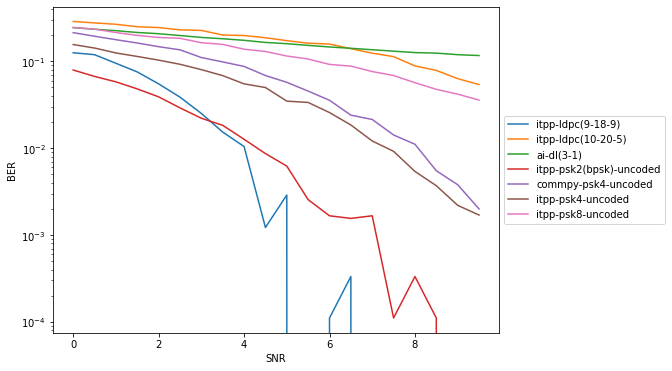

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_10_20_itpp_psk_16,'', label="itpp-ldpc(10-20-5)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(3-1)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

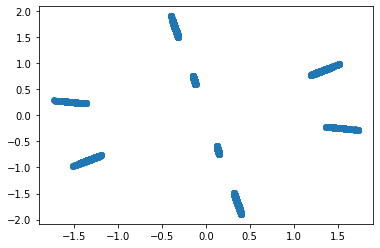

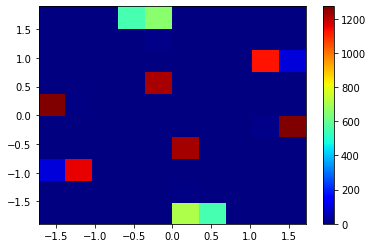

In [17]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

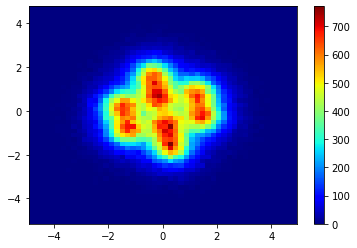

In [18]:
channel_out_array = numpy.transpose(channel_out1)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

Text(0, 0.5, 'Loss')

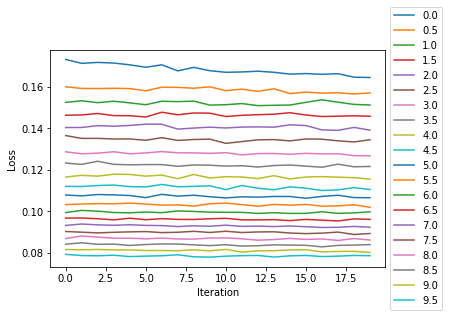

In [19]:
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  plt.plot(training_history1[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel ("Iteration")
plt.ylabel ("Loss")

1.356419
1.3330805


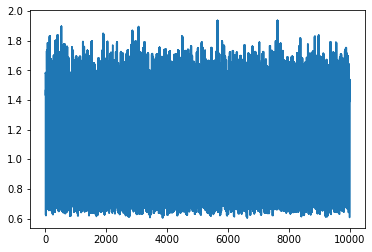

In [20]:
encoded_message = encoder.predict(training_input_message)
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message), axis=1))
plt.plot(x)
print (numpy.mean(x))
print (numpy.max(x) - numpy.min(x))

In [21]:
from keras import backend as K

snr_std = -100
input_message_length = 12
channel_size = 4

def my_loss(y_true, y_pred):
  #tf.reduce_mean (-1 * (y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred) ))
  tf.reduce_mean ((tf.reduce_sum(tf.square(y_true-y_pred), axis=1)))

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

def _loss_tensor(y_true, y_pred):
    print (y_true)
    #y_true_x = tf.cast(y_true, dtype=tf.float32)
    #y_pred_x = tf.cast(y_pred, dtype=tf.float32)
    #out = -(y_true_x * K.log(y_pred_x) + (1.0 - y_true_x) * K.log(1.0 - y_pred_x))
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

input_message_x = Input(shape=(input_message_length,))
# "encoded" is the encoded representation of the input
enc_layer1 = Dense(2*channel_size, activation='tanh')(input_message_x)
enc_layer2 =  enc_layer1 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer1)))
encoder = Model(input_message_x, enc_layer2)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(input_message_length, activation='sigmoid')(encoded_input)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))

#decoder_output = (tf.nn.sigmoid(decoder_input_x))

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "model_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 12)]         0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 8)            104         input_3[0][0]                    
__________________________________________________________________________________________________
tf.math.square_1 (TFOpLambda)   (None, 8)            0           dense_2[0][0]                    
__________________________________________________________________________________________________
tf.math.reduce_mean_1 (TFOpLamb ()                   0           tf.math.square_1[0][0]           
___________________________________________________________________________________________

In [22]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
training_input_message = tf.cast(training_input_message, dtype=tf.float32)
print (training_input_message)
print (len(training_input_message))
print(input_message_length)

test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
test_input_message = tf.cast(test_input_message, dtype=tf.float32)
test_input_message_label = []
for i in range (test_input_message.shape[0]):
  test_input_message_label.append (test_input_message[i][0])
print (test_input_message)
print (len(test_input_message))

tf.Tensor(
[[0. 1. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 1. 1.]], shape=(10000, 12), dtype=float32)
10000
12
tf.Tensor(
[[0. 0. 0. ... 1. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 ...
 [1. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]], shape=(10000, 12), dtype=float32)
10000


In [23]:
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
training_history2 = dict ()
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  awgn_channel = GaussianNoise(sigma,input_shape=(channel_size,))
  autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  #opt = keras.optimizers.Adam(learning_rate=0.003)
  #autoencoder.compile(optimizer=opt, loss=[tf.keras.losses.sparse_categorical_crossentropy],metrics=['accuracy'])
  autoencoder.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
  history = autoencoder.fit(training_input_message, training_input_message,
                #epochs=50, original
                epochs=20,
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message, test_input_message))
  training_history2 [snr] = history


Training for SNR= 0.0  sigma= 1.0
Epoch 1/20
20/20 [==============================] - 1s 10ms/step - loss: 0.3082 - accuracy: 0.0252 - val_loss: 0.2774 - val_accuracy: 0.0186
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.0299 - val_loss: 0.2651 - val_accuracy: 0.0231
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.0387 - val_loss: 0.2542 - val_accuracy: 0.0319
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2776 - accuracy: 0.0417 - val_loss: 0.2442 - val_accuracy: 0.0457
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.0495 - val_loss: 0.2347 - val_accuracy: 0.0563
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.0529 - val_loss: 0.2254 - val_accuracy: 0.0748
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.0563 - val_loss: 0.2158 - val_ac

In [24]:
snrs_list = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
ber_per_iter_dl_tensor1, bler_per_iter_dl_tensor1, channel_out1 = get_ber_bler_of_model(snrs_list, encoder, decoder, training_input_message, training_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 0.969 BER: 0.244
SNR: 0.500:-> BLER: 0.963 BER: 0.234
SNR: 1.000:-> BLER: 0.959 BER: 0.225
SNR: 1.500:-> BLER: 0.951 BER: 0.215
SNR: 2.000:-> BLER: 0.947 BER: 0.208
SNR: 2.500:-> BLER: 0.940 BER: 0.198
SNR: 3.000:-> BLER: 0.926 BER: 0.188
SNR: 3.500:-> BLER: 0.921 BER: 0.182
SNR: 4.000:-> BLER: 0.914 BER: 0.174
SNR: 4.500:-> BLER: 0.900 BER: 0.165
SNR: 5.000:-> BLER: 0.888 BER: 0.160
SNR: 5.500:-> BLER: 0.880 BER: 0.152
SNR: 6.000:-> BLER: 0.863 BER: 0.146
SNR: 6.500:-> BLER: 0.857 BER: 0.141
SNR: 7.000:-> BLER: 0.845 BER: 0.136
SNR: 7.500:-> BLER: 0.838 BER: 0.131
SNR: 8.000:-> BLER: 0.824 BER: 0.126
SNR: 8.500:-> BLER: 0.823 BER: 0.124
SNR: 9.000:-> BLER: 0.807 BER: 0.119
SNR: 9.500:-> BLER: 0.804 BER: 0.116


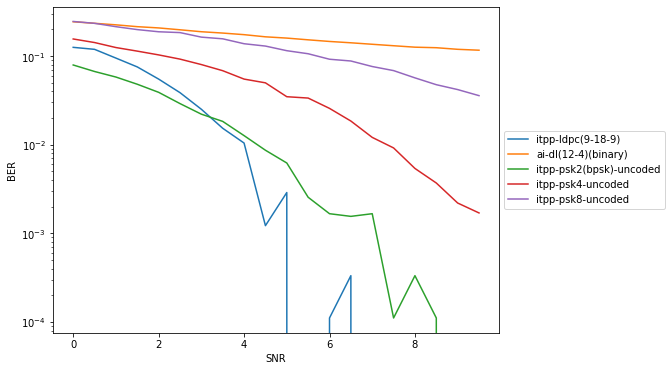

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(12-4)(binary)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ldpc_50_100_itpp_psk_16,'', label="itpp-ldpc(50-100-25)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ldpc_10_20_itpp_psk_16,'', label="itpp-ldpc(10-20-5)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

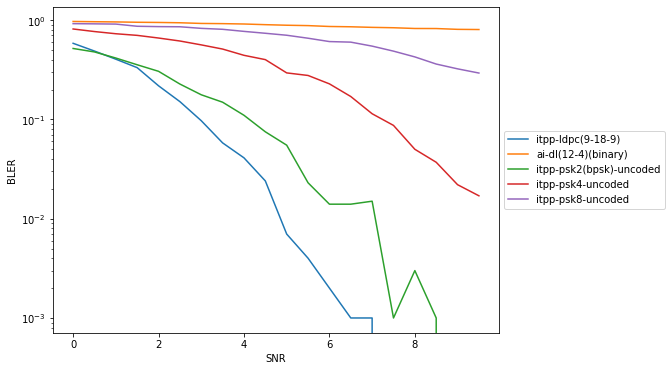

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(12-4)(binary)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_16,'', label="itpp-ldpc(50-100-25)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_ldpc_10_20_itpp_psk_16,'', label="itpp-ldpc(10-20-5)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

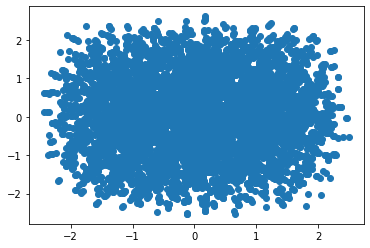

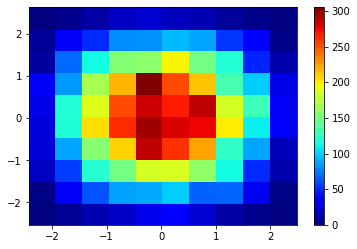

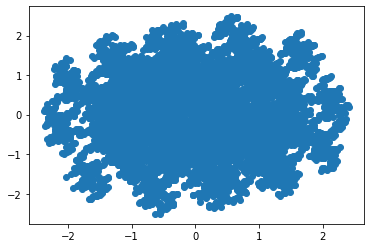

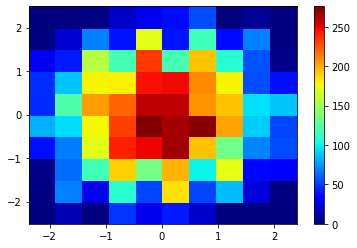

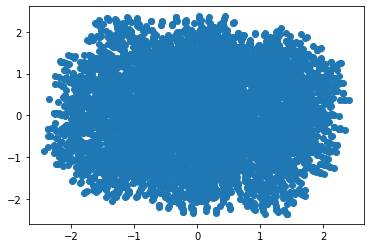

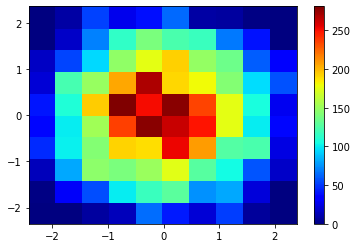

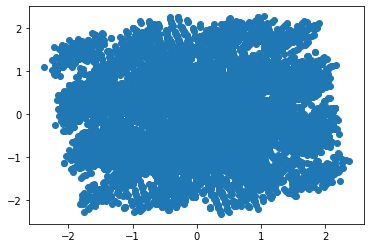

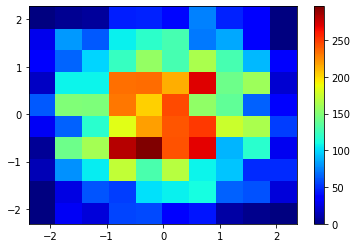

In [31]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

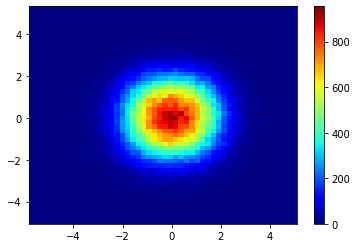

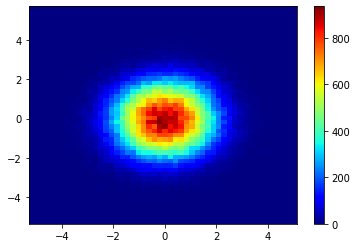

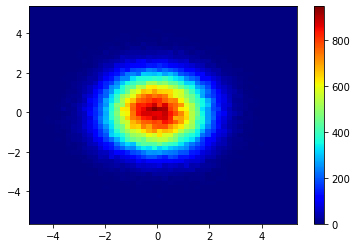

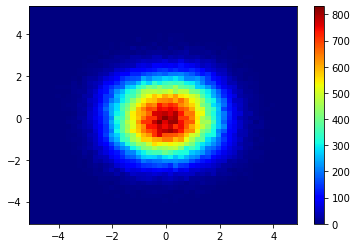

In [32]:
channel_out_array = numpy.transpose(channel_out1)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

In [33]:
for i in range (8):
  print (training_input_message[i])

tf.Tensor([0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.], shape=(12,), dtype=float32)
tf.Tensor([0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.], shape=(12,), dtype=float32)
tf.Tensor([1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.], shape=(12,), dtype=float32)
tf.Tensor([1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.], shape=(12,), dtype=float32)
tf.Tensor([0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.], shape=(12,), dtype=float32)
tf.Tensor([0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.], shape=(12,), dtype=float32)
tf.Tensor([1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.], shape=(12,), dtype=float32)
tf.Tensor([1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.], shape=(12,), dtype=float32)


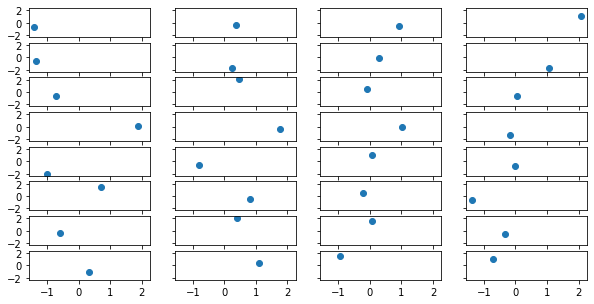

In [34]:
display_points (encoded_message, 8, channel_size)


Text(0, 0.5, 'Loss')

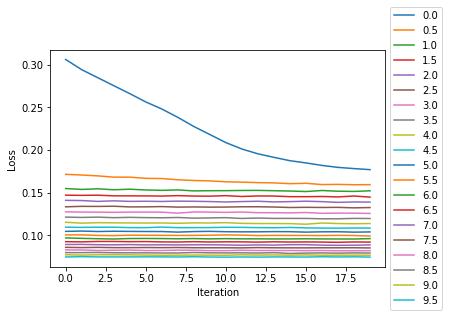

In [35]:

for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  plt.plot(training_history2[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel ("Iteration")
plt.ylabel ("Loss")

2.8133001


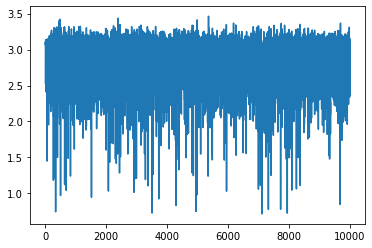

In [36]:

encoded_message = encoder.predict(training_input_message)
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message), axis=1))
plt.plot(x)
print (numpy.mean(x))

In [37]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
test_input_message = tf.cast(test_input_message, dtype=tf.float32)


In [38]:
ber_per_iter_dl_tensor2, bler_per_iter_dl_tensor2, channel_out2 = get_ber_bler_of_model(snrs_list, encoder, decoder, test_input_message, NUM_OF_INPUT_MESSAGE,input_message_length, channel_size)

SNR: 0.000:-> BLER: 0.973 BER: 0.248
SNR: 0.500:-> BLER: 0.968 BER: 0.239
SNR: 1.000:-> BLER: 0.961 BER: 0.229
SNR: 1.500:-> BLER: 0.958 BER: 0.222
SNR: 2.000:-> BLER: 0.954 BER: 0.213
SNR: 2.500:-> BLER: 0.942 BER: 0.201
SNR: 3.000:-> BLER: 0.935 BER: 0.195
SNR: 3.500:-> BLER: 0.924 BER: 0.185
SNR: 4.000:-> BLER: 0.914 BER: 0.176
SNR: 4.500:-> BLER: 0.907 BER: 0.171
SNR: 5.000:-> BLER: 0.900 BER: 0.165
SNR: 5.500:-> BLER: 0.884 BER: 0.157
SNR: 6.000:-> BLER: 0.872 BER: 0.151
SNR: 6.500:-> BLER: 0.866 BER: 0.146
SNR: 7.000:-> BLER: 0.858 BER: 0.142
SNR: 7.500:-> BLER: 0.846 BER: 0.137
SNR: 8.000:-> BLER: 0.837 BER: 0.132
SNR: 8.500:-> BLER: 0.833 BER: 0.128
SNR: 9.000:-> BLER: 0.827 BER: 0.126
SNR: 9.500:-> BLER: 0.816 BER: 0.122


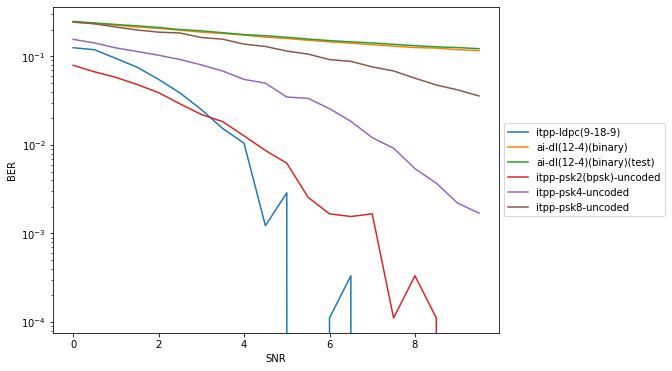

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(12-4)(binary)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(12-4)(binary)(test)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

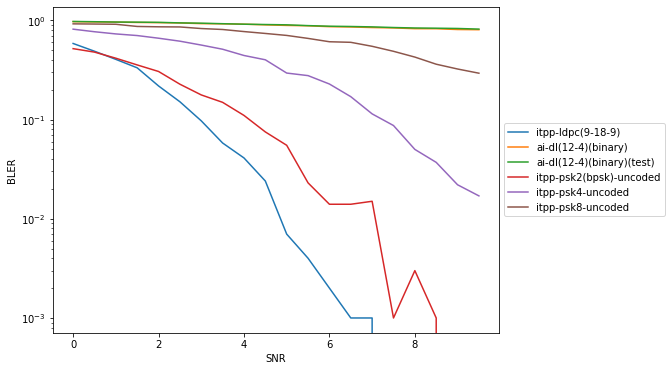

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(12-4)(binary)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(12-4)(binary)(test)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [46]:
from keras import backend as K

snr_std = -100
input_message_length = 51
channel_size = 17

def my_loss(y_true, y_pred):
  #tf.reduce_mean (-1 * (y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred) ))
  tf.reduce_mean ((tf.reduce_sum(tf.square(y_true-y_pred), axis=1)))

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

def _loss_tensor(y_true, y_pred):
    print (y_true)
    #y_true_x = tf.cast(y_true, dtype=tf.float32)
    #y_pred_x = tf.cast(y_pred, dtype=tf.float32)
    #out = -(y_true_x * K.log(y_pred_x) + (1.0 - y_true_x) * K.log(1.0 - y_pred_x))
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

input_message_x = Input(shape=(input_message_length,))
# "encoded" is the encoded representation of the input
enc_layer1 = Dense(2*channel_size, activation='tanh')(input_message_x)
enc_layer2 =  enc_layer1 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer1)))
encoder = Model(input_message_x, enc_layer2)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(input_message_length, activation='sigmoid')(encoded_input)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))

#decoder_output = (tf.nn.sigmoid(decoder_input_x))

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "model_89"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 51)]         0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 34)           1768        input_7[0][0]                    
__________________________________________________________________________________________________
tf.math.square_3 (TFOpLambda)   (None, 34)           0           dense_6[0][0]                    
__________________________________________________________________________________________________
tf.math.reduce_mean_3 (TFOpLamb ()                   0           tf.math.square_3[0][0]           
___________________________________________________________________________________________

In [47]:
NUM_OF_INPUT_MESSAGE_50 = 10* 1000
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE_50,input_message_length))
training_input_message = tf.cast(training_input_message, dtype=tf.float32)
print (training_input_message)
print (len(training_input_message))
print(input_message_length)

test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE_50,input_message_length))
test_input_message = tf.cast(test_input_message, dtype=tf.float32)
print (test_input_message)


tf.Tensor(
[[0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 1.]
 [0. 1. 1. ... 0. 0. 1.]], shape=(10000, 51), dtype=float32)
10000
51
tf.Tensor(
[[0. 0. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 1. 0. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 [1. 1. 0. ... 0. 1. 0.]], shape=(10000, 51), dtype=float32)


In [48]:
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
training_history2 = dict ()
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  awgn_channel = GaussianNoise(sigma,input_shape=(channel_size,))
  autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  #opt = keras.optimizers.Adam(learning_rate=0.003)
  #autoencoder.compile(optimizer=opt, loss=[tf.keras.losses.sparse_categorical_crossentropy],metrics=['accuracy'])
  autoencoder.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
  history = autoencoder.fit(training_input_message, training_input_message,
                #epochs=50, original
                epochs=20,
                batch_size=5000,
                shuffle=False,
                validation_data=(test_input_message, test_input_message))
  training_history2 [snr] = history


Training for SNR= 0.0  sigma= 1.0
Epoch 1/20
2/2 [==============================] - 1s 170ms/step - loss: 0.3120 - accuracy: 0.0197 - val_loss: 0.2848 - val_accuracy: 0.0126
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.3082 - accuracy: 0.0197 - val_loss: 0.2806 - val_accuracy: 0.0130
Epoch 3/20
2/2 [==============================] - 0s 56ms/step - loss: 0.3045 - accuracy: 0.0209 - val_loss: 0.2767 - val_accuracy: 0.0152
Epoch 4/20
2/2 [==============================] - 0s 54ms/step - loss: 0.3018 - accuracy: 0.0241 - val_loss: 0.2730 - val_accuracy: 0.0175
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.2988 - accuracy: 0.0287 - val_loss: 0.2696 - val_accuracy: 0.0193
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 0.2958 - accuracy: 0.0284 - val_loss: 0.2664 - val_accuracy: 0.0213
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 0.2933 - accuracy: 0.0269 - val_loss: 0.2634 - val_accuracy:

In [49]:
ber_per_iter_dl_tensor3, bler_per_iter_dl_tensor3, channel_out3 = get_ber_bler_of_model(snrs_list, encoder, decoder, training_input_message, training_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 1.000 BER: 0.239
SNR: 0.500:-> BLER: 1.000 BER: 0.230
SNR: 1.000:-> BLER: 1.000 BER: 0.219
SNR: 1.500:-> BLER: 1.000 BER: 0.210
SNR: 2.000:-> BLER: 1.000 BER: 0.202
SNR: 2.500:-> BLER: 1.000 BER: 0.193
SNR: 3.000:-> BLER: 1.000 BER: 0.185
SNR: 3.500:-> BLER: 1.000 BER: 0.176
SNR: 4.000:-> BLER: 1.000 BER: 0.169
SNR: 4.500:-> BLER: 1.000 BER: 0.161
SNR: 5.000:-> BLER: 1.000 BER: 0.154
SNR: 5.500:-> BLER: 1.000 BER: 0.147
SNR: 6.000:-> BLER: 0.999 BER: 0.141
SNR: 6.500:-> BLER: 0.998 BER: 0.135
SNR: 7.000:-> BLER: 0.998 BER: 0.130
SNR: 7.500:-> BLER: 0.997 BER: 0.125
SNR: 8.000:-> BLER: 0.996 BER: 0.120
SNR: 8.500:-> BLER: 0.994 BER: 0.116
SNR: 9.000:-> BLER: 0.993 BER: 0.112
SNR: 9.500:-> BLER: 0.990 BER: 0.109


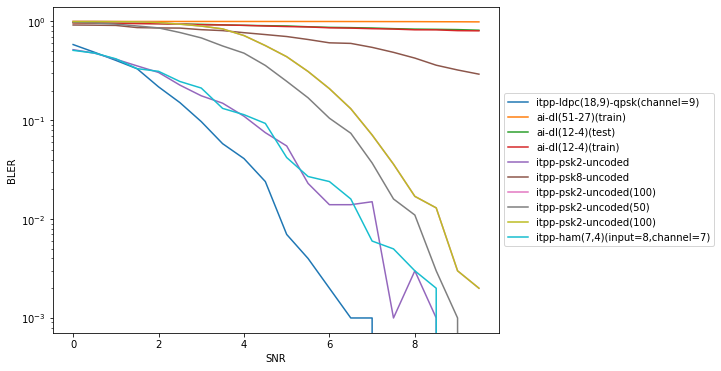

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(18,9)-qpsk(channel=9)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_4,'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor3,'', label="ai-dl(51-27)(train)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(12-4)(test)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(12-4)(train)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_50_itpp_psk_2,'', label="itpp-psk2-uncoded(50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

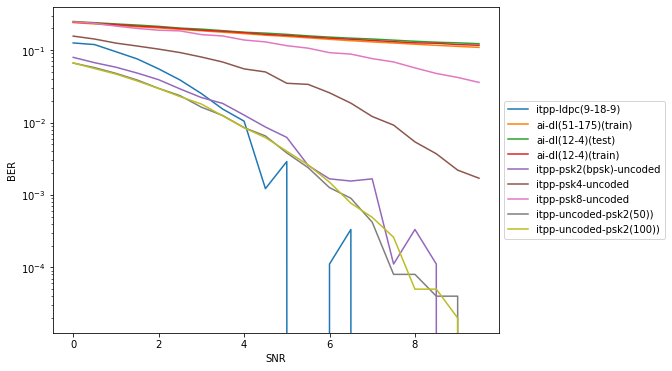

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ldpc_50_100_itpp_psk_4[5:25],'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor3,'', label="ai-dl(51-175)(train)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(12-4)(test)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(12-4)(train)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_50_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(50))") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_100_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(100))") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [53]:
test_input_message = numpy.random.randint(2, size=(int(NUM_OF_INPUT_MESSAGE/10),input_message_length))
test_input_message = tf.cast(test_input_message, dtype=tf.float32)
print (test_input_message)


tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 1. 1. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 0.]], shape=(1000, 51), dtype=float32)


In [54]:
ber_per_iter_dl_tensor4, bler_per_iter_dl_tensor4, channel_out4 = get_ber_bler_of_model(snrs_list, encoder, decoder, test_input_message, test_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 1.000 BER: 0.241
SNR: 0.500:-> BLER: 1.000 BER: 0.232
SNR: 1.000:-> BLER: 1.000 BER: 0.222
SNR: 1.500:-> BLER: 1.000 BER: 0.218
SNR: 2.000:-> BLER: 1.000 BER: 0.207
SNR: 2.500:-> BLER: 1.000 BER: 0.198
SNR: 3.000:-> BLER: 1.000 BER: 0.190
SNR: 3.500:-> BLER: 1.000 BER: 0.182
SNR: 4.000:-> BLER: 1.000 BER: 0.176
SNR: 4.500:-> BLER: 1.000 BER: 0.168
SNR: 5.000:-> BLER: 0.999 BER: 0.159
SNR: 5.500:-> BLER: 0.999 BER: 0.153
SNR: 6.000:-> BLER: 1.000 BER: 0.146
SNR: 6.500:-> BLER: 0.999 BER: 0.139
SNR: 7.000:-> BLER: 1.000 BER: 0.135
SNR: 7.500:-> BLER: 0.998 BER: 0.131
SNR: 8.000:-> BLER: 0.998 BER: 0.126
SNR: 8.500:-> BLER: 0.997 BER: 0.122
SNR: 9.000:-> BLER: 0.995 BER: 0.118
SNR: 9.500:-> BLER: 0.997 BER: 0.115


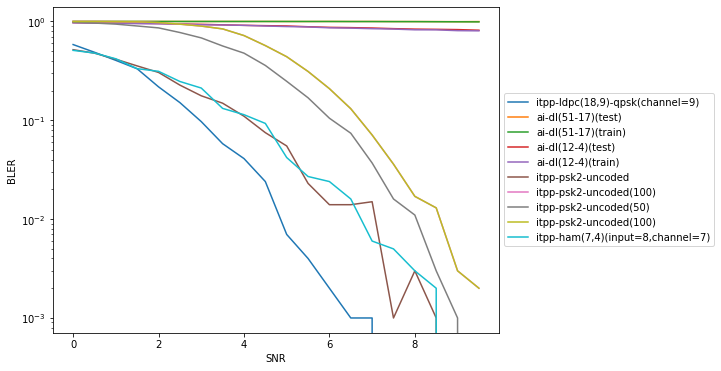

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(18,9)-qpsk(channel=9)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_4,'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor4,'', label="ai-dl(51-17)(test)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor3,'', label="ai-dl(51-17)(train)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(12-4)(test)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(12-4)(train)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_50_itpp_psk_2,'', label="itpp-psk2-uncoded(50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()